<h1> MELANOMA ANALYSIS </h1>

<h3> Load necessary Libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import os

os.getcwd()

'C:\\Users\\eribo'

In [5]:
ml_data = pd.read_csv('C:\\Users\\eribo/documents/pythonjup/melanoma-2.csv')

## Data Preprocessing

1. Preview the data (.head, .tail)
2. Handle Missing Data
3. Check Data Type

In [7]:
ml_data.head()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
0,1,10,3,1,76,1972,6.76,1
1,2,30,3,1,56,1968,0.65,0
2,3,35,2,1,41,1977,1.34,0
3,4,99,3,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


In [8]:
ml_data.tail()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
200,201,4492,2,1,29,1965,7.06,1
201,202,4668,2,0,40,1965,6.12,0
202,203,4688,2,0,42,1965,0.48,0
203,204,4926,2,0,50,1964,2.26,0
204,205,5565,2,0,41,1962,2.90,0


In [9]:
ml_data.dtypes

Unnamed: 0      int64
time            int64
status          int64
sex             int64
age             int64
year            int64
thickness     float64
ulcer           int64
dtype: object

In [10]:
ml_data.shape

(205, 8)

In [13]:
ml_data.isnull().sum()

Unnamed: 0    0
time          0
status        0
sex           0
age           0
year          0
thickness     0
ulcer         0
dtype: int64

In [21]:
ml_data.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [22]:
ml_data.columns

Index(['time', 'status', 'sex', 'age', 'year', 'thickness', 'ulcer'], dtype='object')

## Exploratory Data Analysis (EDA)

1. Summary statistics (Descriptive statistics)
2. Distribution 
3. Correlation

In [23]:
ml_data.describe()

,time,status,sex,age,year,thickness,ulcer
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,1.790244,0.385366,52.463415,1969.907317,2.919854,0.439024
std,1122.060667,0.551204,0.487873,16.671711,2.575563,2.959433,0.497483
min,10.000000,1.000000,0.000000,4.000000,1962.000000,0.100000,0.000000
25%,1525.000000,1.000000,0.000000,42.000000,1968.000000,0.970000,0.000000
50%,2005.000000,2.000000,0.000000,54.000000,1970.000000,1.940000,0.000000
75%,3042.000000,2.000000,1.000000,65.000000,1972.000000,3.560000,1.000000
max,5565.000000,3.000000,1.000000,95.000000,1977.000000,17.420000,1.000000


In [25]:
ml_data.corr()

,time,status,sex,age,year,thickness,ulcer
time,1.000000,0.316146,-0.146499,-0.301518,-0.485504,-0.235409,-0.264757
status,0.316146,1.000000,-0.098967,0.015964,0.138167,-0.204722,-0.270326
sex,-0.146499,-0.098967,1.000000,0.068337,-0.002645,0.185413,0.167979
age,-0.301518,0.015964,0.068337,1.000000,0.188229,0.212480,0.126063
year,-0.485504,0.138167,-0.002645,0.188229,1.000000,-0.133345,-0.033126
thickness,-0.235409,-0.204722,0.185413,0.212480,-0.133345,1.000000,0.424459
ulcer,-0.264757,-0.270326,0.167979,0.126063,-0.033126,0.424459,1.000000


#### POSITIVE CORRELATION
- From 0 - 0.4 (Weak postive correlation)
- From 0.4 - 0.7 (Moderate correlation)
- From 0.7 - 1 (Strong Correlation)

#### NEGATIVE CORRELATION
- From -0 to -0.4 (Weak Negative correlation)
- From -0.4 to -0.7 (Moderate correlation)
- From -0.7 to -1 (Strong Correlation)

### DATA VISUALIZATION

histogram<br>
bar<br>
scatter<br>
boxplot

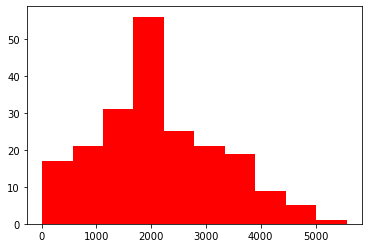

In [26]:
plt.hist(ml_data["time"], color = "Red")
plt.show()

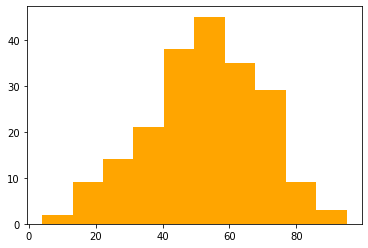

In [27]:
plt.hist(ml_data["age"], color = "Orange")
plt.show()

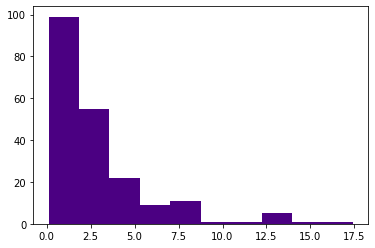

In [28]:
plt.hist(ml_data["thickness"], color = "indigo")
plt.show()

In [35]:
ml_data1 = ml_data[["time", "age", "thickness"]]
ml_data1.head()

,time,age,thickness
0,10,76,6.76
1,30,56,0.65
2,35,41,1.34
3,99,71,2.90
4,185,52,12.08


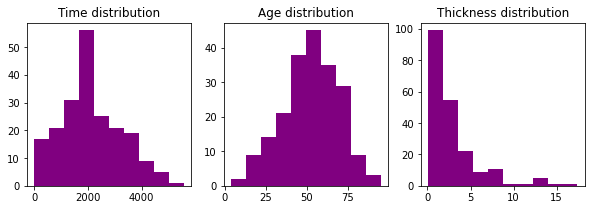

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

counter = 0
loop = range(3)

for i in loop:
    axes[i].hist(ml_data1.iloc[:,counter], color = "purple")
    title = ml_data1.iloc[:,counter].name.capitalize() + " distribution"
    axes[i].set_title(title)
    counter += 1
    
plt.show()

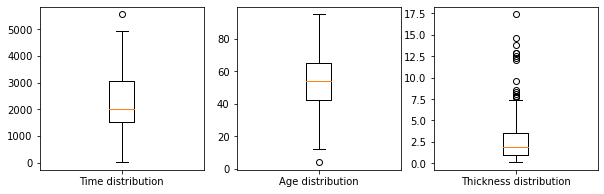

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

counter = 0
loop = range(3)

for i in loop:
    axes[i].boxplot(ml_data1.iloc[:,counter])
    title = ml_data1.iloc[:,counter].name.capitalize() + " distribution"
    axes[i].set_xticklabels([title])
    counter += 1
    
plt.show()

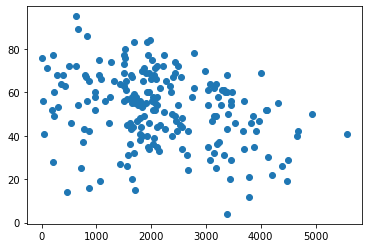

In [41]:
plt.scatter(ml_data1["time"], ml_data1["age"])
plt.show()

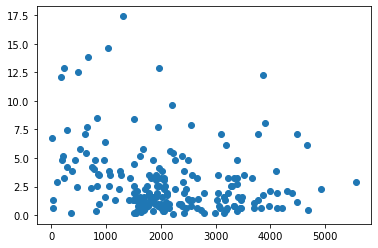

In [42]:
plt.scatter(ml_data1["time"], ml_data1["thickness"])
plt.show()

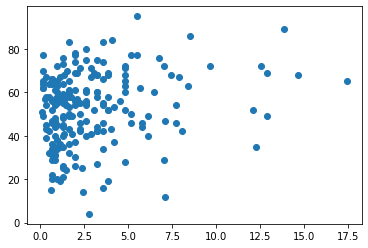

In [44]:
plt.scatter(ml_data1["thickness"], ml_data1["age"])
plt.show()

### MODEL DEVELOPMENT

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### TIME AND THICKNESS

In [60]:
X = ml_data["thickness"].values.reshape(-1, 1)
Y = ml_data["time"].values
lm1 = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [61]:
lm1.fit(X_train, Y_train)

LinearRegression()

In [62]:
# y = mx + c for predicting
lm1.coef_

array([-65.66213642])

In [63]:
lm1.intercept_

2360.101642116009

<b>time = -65.66thickness + 2360.10</b>

### TIME AND AGE

In [64]:
X = ml_data["age"].values.reshape(-1, 1)
Y = ml_data["time"].values
lm2 = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [65]:
lm2.fit(X_train, Y_train)

LinearRegression()

In [66]:
# y = mx + c for predicting
lm2.coef_

array([-20.87032159])

In [67]:
lm2.intercept_

3265.8776145693464

<b>time = -20.87age + 3265.87</b>

### THICKNESS AND AGE

In [68]:
X = ml_data["age"].values.reshape(-1, 1)
Y = ml_data["thickness"].values
lm3= LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [69]:
lm3.fit(X_train, Y_train)

LinearRegression()

In [70]:
# y = mx + c for predicting
lm3.coef_

array([0.0363732])

In [71]:
lm3.intercept_

1.1943224048432681

<b>thickness = 0.04age + 1.19 </b>

In [72]:
predictions = lm3.predict(X_test)

In [73]:
predictions

array([3.8131926 , 3.66769981, 3.37671423, 3.70407301, 2.79474308,
       3.99505858, 2.97660906, 3.52220702, 3.30396784, 2.72199668,
       2.90386267, 3.30396784, 3.30396784, 3.01298226, 1.73992036,
       3.41308743, 4.64977613, 2.79474308, 3.55858022, 2.79474308,
       2.75836988, 4.24967096, 2.43101111, 3.55858022, 3.63132661,
       2.86748947, 2.32189152, 2.28551832, 2.86748947, 3.08572866,
       3.63132661, 2.83111628, 2.24914512, 2.72199668, 2.68562349,
       3.34034104, 2.72199668, 3.26759464, 3.84956579, 2.64925029,
       2.06727914, 1.92178635, 3.08572866, 3.15847505, 2.4673843 ,
       3.23122144, 3.66769981, 2.83111628, 3.19484825, 2.72199668,
       3.15847505, 2.24914512, 3.19484825, 1.33981519, 3.37671423,
       2.21277192, 3.41308743, 2.83111628, 3.37671423, 3.15847505,
       2.32189152, 3.92231219])

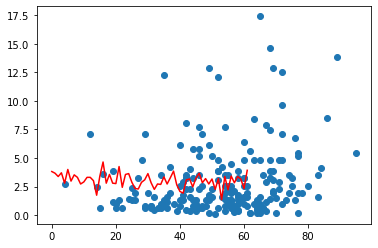

In [75]:
plt.scatter(ml_data1 ["age"], ml_data1 ["thickness"])
plt.plot(predictions, color = "red")
plt.show()

### MODEL EVALUATION

mean_square_error
r_squared

In [76]:
r_squared = lm3.score(X_test, Y_test)
r_squared

0.0029447695607270896

r_squared is 0.29%. Based on the performance of the model is extremely poor.

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions, squared = False)
mse

2.245553043505667